## 正规方程##

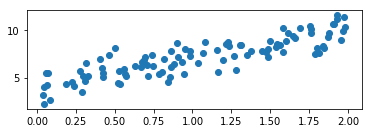

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)#这个n表示的是生成的参数具有正态分布
f1 = plt.figure(1)
plt.subplot(211)
plt.scatter(x,y)


使用np.linalg.inv计算矩阵逆，dot计算矩阵的乘法

In [2]:
x_b=np.c_[np.ones((100,1)),x]
print(x_b)
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[1.         1.981836  ]
 [1.         0.18446974]
 [1.         1.49999089]
 [1.         1.91211177]
 [1.         0.62706063]
 [1.         0.8028824 ]
 [1.         0.71343183]
 [1.         1.69088955]
 [1.         0.85514752]
 [1.         0.9500202 ]
 [1.         1.1968504 ]
 [1.         1.2286202 ]
 [1.         0.04617426]
 [1.         1.58358168]
 [1.         0.42226664]
 [1.         0.94262542]
 [1.         0.74277585]
 [1.         0.04071769]
 [1.         0.07328159]
 [1.         1.81345084]
 [1.         1.88033137]
 [1.         0.42614305]
 [1.         1.21287485]
 [1.         0.86000995]
 [1.         1.79020152]
 [1.         1.44748379]
 [1.         1.56304034]
 [1.         1.64763632]
 [1.         1.2651369 ]
 [1.         1.4760806 ]
 [1.         0.74052033]
 [1.         1.75978299]
 [1.         1.23472312]
 [1.         0.67300227]
 [1.         1.3071534 ]
 [1.         0.52598037]
 [1.         1.95869128]
 [1.         1.80407042]
 [1.         1.06976514]
 [1.         0.87843967]


使用训练得到的参数进行预测

In [3]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]#c_就是左右连接两个矩阵
y_predict=x_new_b.dot(theta_best)
print(y_predict)

[[ 4.07290357]
 [10.01549812]]


画出这个模型的图像

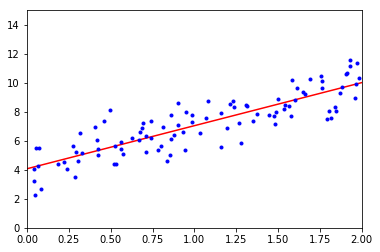

In [4]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])#x轴的范围 与 y轴的范围
plt.show()

## 使用sklearn可以达到相同效果 ##

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
lin_reg.predict(x_new)

[4.07290357] [[2.97129727]]


array([[ 4.07290357],
       [10.01549812]])

## 批量梯度下降 ##

In [6]:
eta=0.1 #学习率
n_iter=1000
m=len(y)
theta=np.random.randn(2,1)#随机初始值
for iter in range(n_iter):
    gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradients
print(theta)

[[4.07290357]
 [2.97129727]]


## 随机梯度下降 ##

1. 批量梯度下降用所有数据，比较费时。随机梯度下降用了很少的数据，使得可以在大规模数据集上使用
2. 另一方面，由于他的随机性，与批量梯度下降相比，呈现出更多的不规律性，他达到最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间推移，他会非常靠近最小值，但不是不会停在一个值上，而是一直在一个值附近摆动。因此算法停止时，最后参数还不错，但不是最优值
3. 当损失函数不规则时，随机梯度下降能够跳过局部最小值，因此随机梯度下降在寻找全局最优值比批量梯度要好
4. 虽然可以跳过局部最优，但同时不能达到全局最小值，解决的一个方法时模拟退火，即逐渐降低学习率，开始步子大，变得越来越小

In [8]:
n_epochs=50
t0,t1=5,50#模拟退火算法超参数
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        #print(xi)
        #print(yi)
        #input()
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
print(theta)
 

[[4.05220097]
 [3.00350887]]


## 使用sklearn完成随机梯度下降 ##

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())
print(sgd_reg.intercept_,sgd_reg.coef_)

[4.05406905] [2.95010924]


D:\Anoconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
